> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`,
* `title` - `str`,
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`.

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [ ]:
from dataclasses import dataclass
from enum import Enum

class BiteLevel(Enum):
    Beginner= 'Beginner'
    Intermediate= 'Intermediate'
    Advanced ='Advanced'

@dataclass(order=True)
class Bite:
    number: int
    title: str
    level: BiteLevel= BiteLevel.Beginner

    def __str__(self):
        return f'{self.number} - {self.title} ({self.level.value})'

bites = []
bites.append(Bite(154, 'Escreva uma dataclass', BiteLevel.Intermediate))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', BiteLevel.Intermediate))

for b in sorted(bites):
    print(b)


1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`).
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [ ]:
from pydantic import BaseModel, Field, field_validator
from typing import Optional
from datetime import time

class WeatherObservation(BaseModel):
    date: str
    temperature: float
    isCelsius: Optional[bool] = Field(default=True)
    airQualityIndex: Optional[int] = None
    sunriseTime: Optional[time] = None
    sunsetTime: Optional[time] = None

    @field_validator("isCelsius", mode="before")
    def parse_is_celsius(cls, value):
        if isinstance(value, str):
            return value.lower() in ["true", "yes", "1"]
        return bool(value)

    @field_validator("temperature", mode="before")
    def convert_temperature(cls, value, info):
        is_celsius = info.data.get("isCelsius", True)
        if isinstance(value, str):
            try:
                value = float(value)
            except ValueError:
                raise ValueError(f"Invalid temperature value: {value}")
        return (value - 32) * 5 / 9 if not is_celsius else value

    @field_validator("airQualityIndex", mode="before")
    def parse_air_quality_index(cls, value):
        if value is None:
            return None
        return int(value)

    @field_validator("sunriseTime", "sunsetTime", mode="before")
    def parse_time(cls, value):
        if value:
            return time.fromisoformat(value)
        return None

data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

valid_observations = []
for sample in data_samples:
    try:
        observation = WeatherObservation(**sample)
        valid_observations.append(observation)
    except Exception as e:
        print(f"Error processing sample {sample}: {e}")

if valid_observations:
    avg_temperature_celsius = sum(obs.temperature for obs in valid_observations) / len(valid_observations)
    print(f"Average temperature in Murmansk: {avg_temperature_celsius:.2f}°C")
else:
    print("No valid observations to calculate the average temperature.")


Average temperature in Murmansk: 47.00°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ...
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
```

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [ ]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

In [ ]:
from pydantic import BaseModel, Field
from typing import List

class HourlyUnits(BaseModel):
    time: str = Field(..., description="Unidade de tempo, geralmente ISO 8601")
    temperature_2m: str = Field(..., description="Unidade da temperatura em 2 metros")

class Hourly(BaseModel):
    time: List[str] = Field(..., description="Lista de timestamps em formato ISO 8601")
    temperature_2m: List[float] = Field(..., description="Lista de temperaturas em 2 metros")

class OpenMeteo(BaseModel):
    latitude: float = Field(..., description="Latitude da localização")
    longitude: float = Field(..., description="Longitude da localização")
    generationtime_ms: float = Field(..., description="Tempo de geração da resposta em milissegundos")
    utc_offset_seconds: int = Field(..., description="Diferença de UTC em segundos")
    timezone: str = Field(..., description="Fuso horário")
    timezone_abbreviation: str = Field(..., description="Abreviação do fuso horário")
    elevation: float = Field(..., description="Elevação em metros")
    hourly_units: HourlyUnits = Field(..., description="Unidades dos dados horários")
    hourly: Hourly = Field(..., description="Dados horários, incluindo tempo e temperatura")

response = {
    "latitude": -19.5,
    "longitude": -43.375,
    "generationtime_ms": 0.01800060272216797,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 2.0,
    "hourly_units": {
        "time": "iso8601",
        "temperature_2m": "°C"
    },
    "hourly": {
        "time": [
            "2024-07-19T00:00",
            "2024-07-19T01:00",
            "2024-07-19T02:00",
        ],
        "temperature_2m": [
            21.9,
            20.9,
            20.0,
        ]
    }
}

dados = OpenMeteo(**response)

print(dados)


latitude=-19.5 longitude=-43.375 generationtime_ms=0.01800060272216797 utc_offset_seconds=0 timezone='GMT' timezone_abbreviation='GMT' elevation=2.0 hourly_units=HourlyUnits(time='iso8601', temperature_2m='°C') hourly=Hourly(time=['2024-07-19T00:00', '2024-07-19T01:00', '2024-07-19T02:00'], temperature_2m=[21.9, 20.9, 20.0])


#### Q4.

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

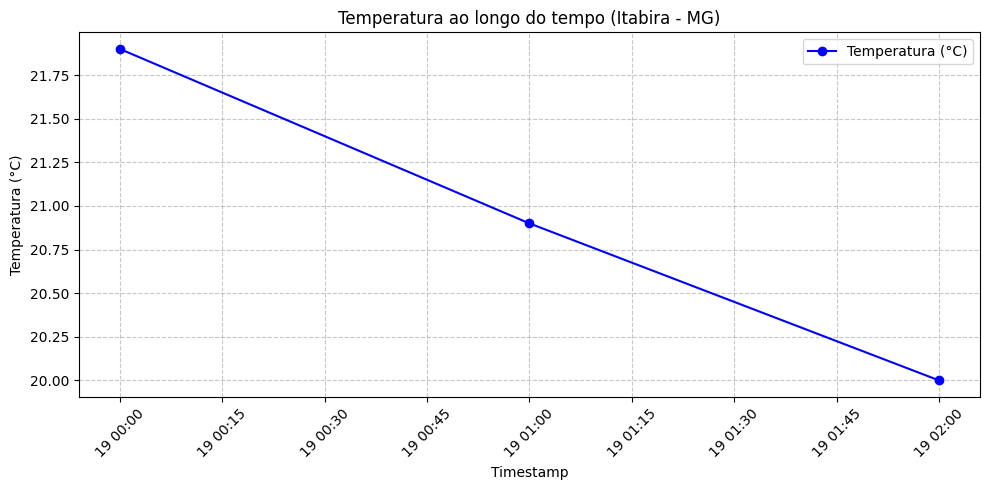

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

timestamps = [
    "2024-07-19T00:00",
    "2024-07-19T01:00",
    "2024-07-19T02:00",
]
temperatures = [21.9, 20.9, 20.0]

timestamps_dt = [datetime.fromisoformat(ts) for ts in timestamps]

plt.figure(figsize=(10, 5))
plt.plot(timestamps_dt, temperatures, marker='o', linestyle='-', color='b', label='Temperatura (°C)')
plt.title("Temperatura ao longo do tempo (Itabira - MG)")
plt.xlabel("Timestamp")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc="upper right")
plt.tight_layout()